In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

# Exploratory Data Analysis

In [2]:
df0 = pd.read_excel('/Users/gurleenkaur/Downloads/archive/marketing_campaign.xlsx')
df = df0.copy()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# There are 24 missing values in the income field. Replace them with the mean income,
# which seems a better option than deleting or replacing with 0.
df['Income'] = df['Income'].fillna(np.mean(df["Income"]), axis=0)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Change the data type of Dt_Customer 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Create three new columns
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop('Dt_Customer', axis=1)

In [10]:
# Encode education and marital status columns

le = LabelEncoder()

label1 = le.fit_transform(df['Education'])
df.drop('Education', axis = 1)
df['Education'] = label1

label2 = le.fit_transform(df['Marital_Status'])
df.drop('Marital_Status', axis = 1)
df['Marital_Status'] = label2

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,...,0,0,0,0,3,11,0,2013,6,13
2236,4001,1946,4,5,64014.0,2,1,56,406,0,...,0,1,0,0,3,11,0,2014,6,10
2237,7270,1981,2,2,56981.0,0,0,91,908,48,...,0,0,0,0,3,11,0,2014,1,25
2238,8235,1956,3,5,69245.0,0,1,8,428,30,...,0,0,0,0,3,11,0,2014,1,24


In [11]:
# Filter and drop columns with a single value

for col in df.columns:
    if len(df[col].value_counts()) == 1:
        print(df[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


# Logistic Regression Model

In [12]:
# Specify the dependent and independent variable

y = df['Response']
x = df.drop(['ID', 'Response', 'Z_CostContact', 'Z_Revenue'], axis = 1)
x

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,2012,9,4
1,1954,2,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,2014,3,8
2,1965,2,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,2013,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,2014,2,10
4,1981,4,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,2013,6,13
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,2014,6,10
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,2014,1,25
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,2014,1,24


<AxesSubplot:>

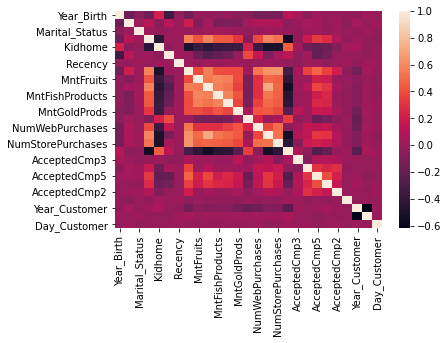

In [13]:
# Check correlation

corr_matrix = x.corr()
sns.heatmap(corr_matrix)

In [14]:
corr_matrix

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
Year_Birth,1.000000,-0.171390,-0.060580,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,-0.028188,0.024246,-0.009193
Education,-0.171390,1.000000,0.007090,0.119974,-0.045564,0.118485,-0.011728,0.197576,-0.080412,0.033625,...,-0.040281,0.005836,0.053266,0.033346,-0.010845,0.021369,-0.050540,0.045356,-0.011304,0.018291
Marital_Status,-0.060580,0.007090,1.000000,0.021267,-0.022553,-0.003596,0.014159,0.008205,0.000593,0.030689,...,-0.031210,-0.027113,0.014381,0.012817,-0.017097,0.018417,-0.005718,-0.018176,0.017708,-0.016087
Income,-0.160942,0.119974,0.021267,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,...,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,0.022366,-0.014888,-0.031058
Kidhome,0.230176,-0.045564,-0.022553,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,0.053339,-0.023571,-0.001718
Teenhome,-0.352111,0.118485,-0.003596,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.008260,-0.014124,0.005697
Recency,-0.019871,-0.011728,0.014159,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.026084,0.014040,0.010877
MntWines,-0.157773,0.197576,0.008205,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,-0.154188,0.046139,-0.000413
MntFruits,-0.017917,-0.080412,0.000593,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,-0.055150,0.003741,-0.020998
MntMeatProducts,-0.030872,0.033625,0.030689,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,-0.082472,0.018390,-0.012561


In [15]:
# Import logistic model
x1 = sm.add_constant(x)
logr_model = sm.Logit(y,x)
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.285149
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2213
Method:                           MLE   Df Model:                           26
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                  0.3229
Time:                        10:19:14   Log-Likelihood:                -638.73
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                6.781e-112
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year_Birth             -0.0042      0.007     -0.636      0.525      -0.017       0.009
Ed

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
x_train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
519,1944,3,3,80184.0,0,0,19,1035,134,670,...,3,0,0,1,1,0,0,2014,3,1
800,1970,3,3,61872.0,0,1,81,330,5,159,...,4,0,0,0,0,0,0,2013,12,13
546,1964,2,6,85620.0,0,0,68,416,46,925,...,1,0,0,0,0,0,0,2014,1,7
996,1978,2,5,75437.0,0,0,25,795,0,545,...,6,0,0,0,1,0,0,2013,11,9
63,1951,4,6,67680.0,0,1,8,546,0,48,...,5,0,0,0,0,0,0,2013,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1974,2,3,60093.0,0,1,92,502,12,109,...,6,0,0,0,0,0,0,2013,6,26
1425,1970,2,3,28164.0,1,0,23,3,18,26,...,7,0,0,0,0,0,0,2013,5,4
1952,1951,2,4,80872.0,0,0,60,483,72,567,...,1,0,0,0,0,0,0,2014,5,12
1059,1987,2,5,67605.0,0,0,84,336,28,282,...,1,0,0,0,0,0,0,2013,3,31


In [17]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.859375


/Users/gurleenkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_pred = logreg.predict(x_test)

#confusion matrix for the logistic model prediction

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[367  12]
 [ 60   9]]


In [19]:
#classification report for logistic model prediction

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.43      0.13      0.20        69

    accuracy                           0.84       448
   macro avg       0.64      0.55      0.56       448
weighted avg       0.79      0.84      0.80       448



In [20]:
#SVM model

svc_model=svm.SVC(kernel='linear')
svc_final=svc_model.fit(x_train,y_train)
print(svc_final.score(x_train,y_train))

0.85546875


In [21]:
y_pred1=svc_model.predict(x_test)
print(classification_report(y_test,y_pred1))#classification report for svm model prediction

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       379
           1       0.54      0.10      0.17        69

    accuracy                           0.85       448
   macro avg       0.70      0.54      0.54       448
weighted avg       0.81      0.85      0.80       448



In [22]:
cm1=confusion_matrix(y_test, y_pred1)#confusion matrix for the svm model prediction
print(cm1)

[[373   6]
 [ 62   7]]


In [23]:
print(svc_model.coef_)# obtain features weight to see which factor is more important

[[ 2.10454167e+01  2.78048695e+01  4.02596133e+00 -5.28364442e-02
   9.76546148e+00 -2.47803478e+01 -3.06020441e+01  2.16396524e+00
  -5.86744591e+00  3.85902303e+00 -3.66140249e+00 -1.42802484e+00
   5.96359039e+00  2.14156373e+01 -1.84415991e+00  5.26348468e+01
  -9.01517350e+01  7.28475019e+01  3.69627793e+01  2.20000000e+01
   2.90000000e+01  3.77519768e+01  8.00000000e+00 -1.00000000e+00
  -4.84632612e+01 -1.63622859e+00 -9.40729745e+00]]
